In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [17]:
import pandas as pd

# Define a function to print bad lines
def print_bad_lines(line):
    print("Bad line:", line)
    return None  # Return None to skip the line

# Use the custom function with on_bad_lines and set engine='python'
df = pd.read_csv('Dataset/books.csv', on_bad_lines=print_bad_lines, engine='python')

# Continue with the rest of your data processing
print("Data loaded successfully!")


Bad line: ['12224', 'Streetcar Suburbs: The Process of Growth in Boston  1870-1900', 'Sam Bass Warner', ' Jr./Sam B. Warner', '3.58', '0674842111', '9780674842113', 'en-US', '236', '61', '6', '4/20/2004', 'Harvard University Press']
Bad line: ['16914', "The Tolkien Fan's Medieval Reader", 'David E. Smith (Turgon of TheOneRing.net', ' one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)', '3.58', '1593600119', '9781593600112', 'eng', '400', '26', '4', '4/6/2004', 'Cold Spring Press']
Bad line: ['22128', 'Patriots (The Coming Collapse)', 'James Wesley', ' Rawles', '3.63', '156384155X', '9781563841552', 'eng', '342', '38', '4', '1/15/1999', 'Huntington House Publishers']
Bad line: ['34889', "Brown's Star Atlas: Showing All The Bright Stars With Full Instructions How To Find And Use Them For Navigational Purposes And Department Of Trade Examinations.", 'Brown', ' Son & Ferguson', '0.00', '0851742718', '9780851742717', 'eng', '49', '0', '0', '5/1/1977

In [18]:
df = pd.read_csv('Dataset/books.csv', on_bad_lines='skip')
# Skipping erroneous lines, there's only 4 such lines hence it won't have any real impact on the model performance

In [19]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [20]:
df.duplicated().sum()

np.int64(0)

There are no duplicate entries. But while working with the dataset I realized that there were some rows with the same 'title' and different values for rest of the features. Hence, I chose the strategy of keeping one of all such rows in each case, based on the highest 'ratings_count'.

In [21]:
# Group by 'title' and keep only the row with highest 'ratings_count' for each title
df = df.loc[df.groupby('title')['ratings_count'].idxmax()]
df = df.reset_index(drop=True) #reset index to ensure the indices are continuous
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,6549,said the shotgun to the head.,Saul Williams,4.22,0743470796,9780743470797,en-US,192,2762,214,9/1/2003,MTV Books
1,14490,$30 Film School: How to Write Direct Produce...,Michael W. Dean,3.49,1592000673,9781592000678,eng,528,30,4,5/13/2003,Cengage Learning
2,5413,'Salem's Lot,Stephen King/Jerry N. Uelsmann,4.25,0385516487,9780385516488,eng,594,84123,571,11/1/2005,Doubleday
3,11525,1 000 Places to See Before You Die,Patricia Schultz,3.85,0761104844,9780761104841,eng,992,36303,439,5/22/2003,Workman Publishing Company
4,8542,10 lb Penalty,Dick Francis,3.90,042519745X,9780425197455,eng,320,3490,177,8/3/2004,G.P. Putnam's Sons
...,...,...,...,...,...,...,...,...,...,...,...,...
10343,31993,鋼之鍊金術師 6,Hiromu Arakawa/荒川弘/方郁仁,4.58,9861146148,9789861146140,zho,191,5,0,6/2/2004,東立
10344,31999,鋼之鍊金術師 7,Hiromu Arakawa/荒川弘/方郁仁,4.57,9861146156,9789861146157,zho,191,5,0,6/12/2004,東立
10345,31996,鋼之鍊金術師 9,Hiromu Arakawa/荒川弘/方郁仁,4.57,9861156526,9789861156521,zho,184,4,0,12/16/2004,東立
10346,15318,魔戒二部曲：雙城奇謀,J.R.R. Tolkien/托爾金/Alan Lee/朱學恆,4.44,9570823372,9789570823370,zho,467,24,0,12/20/2001,聯經出版事業股份有限公司


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bookID,10348.0,2.151324e+04,1.307588e+04,1.000000e+00,1.054050e+04,2.094650e+04,3.223575e+04,4.564100e+04
average_rating,10348.0,3.933215e+00,3.570271e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.140000e+00,5.000000e+00
isbn13,10348.0,9.758306e+12,4.592271e+11,8.987060e+09,9.780345e+12,9.780586e+12,9.780872e+12,9.790008e+12
num_pages,10348.0,3.344452e+02,2.384097e+02,0.000000e+00,1.940000e+02,2.960000e+02,4.110000e+02,6.576000e+03
ratings_count,10348.0,1.920066e+04,1.165054e+05,0.000000e+00,1.110000e+02,8.565000e+02,5.730000e+03,4.597666e+06
text_reviews_count,10348.0,5.764061e+02,2.667342e+03,0.000000e+00,9.000000e+00,5.000000e+01,2.610000e+02,9.426500e+04


The ratings_count and text_reviews_count columns exhibit a large spread (high standard deviation) relative to the mean, indicating a high level of variance in the number of ratings and text reviews books receive. They also have a high maximum value, indicating the presence of outliers (books with an exceptionally high number of ratings or reviews).

I have decided to leave the outliers as it is in this project. It's a book recommendation model, and these outliers provide valuable information to it. For example, books with exceptionally high ratings could be bestsellers or classics. I want my model to recommend these books to the user which is only possible if the model has the knowledge of these outliers.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10348 non-null  int64  
 1   title               10348 non-null  object 
 2   authors             10348 non-null  object 
 3   average_rating      10348 non-null  float64
 4   isbn                10348 non-null  object 
 5   isbn13              10348 non-null  int64  
 6   language_code       10348 non-null  object 
 7     num_pages         10348 non-null  int64  
 8   ratings_count       10348 non-null  int64  
 9   text_reviews_count  10348 non-null  int64  
 10  publication_date    10348 non-null  object 
 11  publisher           10348 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 970.3+ KB


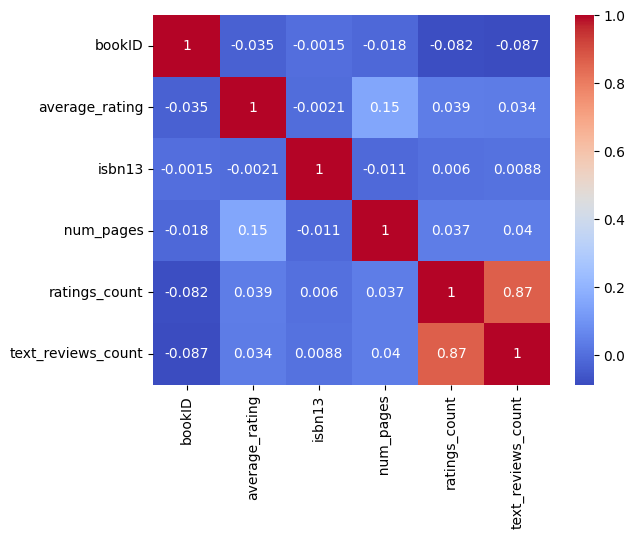

In [24]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


The heatmap tells us that 'ratings_count' and 'text_reviews_count' are highly correlated. Later, we can use these two features to create a new feature to input into the model.  

In [25]:
#save the df
df.to_pickle('File_dump/df.pkl')
